EJERCICIO AC03

- Una empresa de ecommerce B2B se plantea utilizar una funcionalidad para su web que le permite hacer 
una recomendación de producto a sus usuarios con el objetivo de aumentar el valor medio de las ventas. 
De cara a validar que este sistema de recomendación tiene un efecto positivo nuestra empresa decide 
plantear un Test de Hipótesis y testear el servicio durante 3 meses antes de decidir si lo deben adoptar o 
no en base al posible efecto incremental en las ventas. ​
El datastet adjunto incluye los datos finales del test y contiene tres columnas. 
La primera es el identificador de la venta, la segunda es el valor de la venta y el tercero 
es la clase (1 para las ventas en las que el sistema de recomendación ha participado y 0 en las que no 
ha participado) ​

Se pide: ​
​
Visualización y comprensión del dataset: ​
- Visualizar los histogramas de las clases ​
- Discutir si tenemos la misma distribución de ventas​
- Validar la hipótesis que la clase 1 tiene un valor de venta medio más alta : ​
- En el caso que la hipótesis sea válida, ¿Qué incremento neto de ventas se produce mediante el sitema 
  de recomendación?​
- En el caso que se confirme que la hipótesis no es válida, ¿Qué ​
  factores influyen en que no lo sea?​
- Discusión de resultados y vías abiertas: En base a los resultados ​
  obtenidos en los puntos anteriores, ¿Recomendarías el uso de este sistema de recomendación?, 
  ¿Por qué?, ¿Qué factores se deberían tomar en cuenta para la toma de la decisión? ​
​

In [ ]:
install.packages("pastecs")
library(pastecs) #>> las funciones: str,stat.desc, table,plot,...
install.packages("modeest")
library(modeest) #>> calcular la moda
install.packages("vcd")
library(vcd)#necesario para ggplo2
library(dplyr) #>> manipulación de datasets: group_by(), summarize()
library(scales) #útil para graficación
install.packages("agricolae")
library(agricolae)  #>> crear tablas de frecuencias agrupadas
install.packages("ggplot2")
library(ggplot2) #>> graficación
install.packages("car")
library(car) #lo necesitamos para el qqPlot
library('readxl')
install.packages('BSDA')
library(BSDA)

In [10]:
data = read.csv (file = 'b2b_ecommerce_sales_data.csv', header = TRUE, sep = ',', dec = '.')
head(data)
tail(data)

,Reference,Order.Value,Group
,<int>,<dbl>,<int>
1,570554,0.38,1
2,567869,0.40,0
3,539441,0.42,0
4,542736,0.55,0
5,573589,0.55,0
6,540833,0.65,1


,Reference,Order.Value,Group
,<int>,<dbl>,<int>
11781,578315,9467.23,0
11782,551698,9468.60,1
11783,556090,9471.27,0
11784,537253,9473.16,1
11785,554094,9475.20,1
11786,557888,9476.80,1


In [8]:
dim(data)

[1] 11786     3

In [11]:
names(data)

[1] "Reference"   "Order.Value" "Group"

In [13]:
str(data)

'data.frame':	11786 obs. of  3 variables:
 $ Reference  : int  570554 567869 539441 542736 573589 540833 560217 542136 549534 540945 ...
 $ Order.Value: num  0.38 0.4 0.42 0.55 0.55 0.65 0.79 0.84 0.84 0.85 ...
 $ Group      : int  1 0 0 0 0 1 1 1 1 0 ...


In [15]:
summary(data)

   Reference       Order.Value          Group       
 Min.   :536365   Min.   :   0.38   Min.   :0.0000  
 1st Qu.:547564   1st Qu.: 528.66   1st Qu.:0.0000  
 Median :558626   Median :2376.76   Median :1.0000  
 Mean   :558883   Mean   :3104.26   Mean   :0.5332  
 3rd Qu.:570289   3rd Qu.:5244.93   3rd Qu.:1.0000  
 Max.   :581587   Max.   :9476.80   Max.   :1.0000  

In [41]:
data_wo = data[data$Group == 0, ]
data_wt = data[data$Group == 1, ]
summary(data_wo)
summary(data_wt)
str(data_wo)
str(data_wt)

   Reference       Order.Value         Group  
 Min.   :536365   Min.   :   0.4   Min.   :0  
 1st Qu.:547524   1st Qu.: 475.2   1st Qu.:0  
 Median :558622   Median :2170.6   Median :0  
 Mean   :558874   Mean   :3024.8   Mean   :0  
 3rd Qu.:570255   3rd Qu.:5191.5   3rd Qu.:0  
 Max.   :581587   Max.   :9471.3   Max.   :0  

   Reference       Order.Value          Group  
 Min.   :536366   Min.   :   0.38   Min.   :1  
 1st Qu.:547647   1st Qu.: 601.39   1st Qu.:1  
 Median :558632   Median :2526.08   Median :1  
 Mean   :558891   Mean   :3173.84   Mean   :1  
 3rd Qu.:570406   3rd Qu.:5283.07   3rd Qu.:1  
 Max.   :581583   Max.   :9476.80   Max.   :1  

'data.frame':	5502 obs. of  3 variables:
 $ Reference  : int  567869 539441 542736 573589 540945 544438 544927 538194 572832 542594 ...
 $ Order.Value: num  0.4 0.42 0.55 0.55 0.85 0.85 0.85 0.95 1 1.25 ...
 $ Group      : int  0 0 0 0 0 0 0 0 0 0 ...
'data.frame':	6284 obs. of  3 variables:
 $ Reference  : int  570554 540833 560217 542136 549534 551538 538669 539645 564665 539715 ...
 $ Order.Value: num  0.38 0.65 0.79 0.84 0.84 0.85 0.95 0.95 1.1 1.25 ...
 $ Group      : int  1 1 1 1 1 1 1 1 1 1 ...


In [67]:

cat("SD for Variable users without feature: " , sd(data_wo$Order.Value) , "; SD for variable users with feature: " ,  sd(data_wt$Order.Value))
mean(data_wo$Order.Value)
mean(data_wt$Order.Value)
median(data_wo$Order.Value)
median(data_wt$Order.Value)

SD for Variable users without feature:  2817.731 ; SD for variable users with feature:  2795.303

[1] 3024.787

[1] 3173.837

[1] 2170.6

[1] 2526.08

In [58]:
cat("Variance for Variable users without feature: " ,var(data_wo$Order.Value) ,"; Variance for variable users with feature: ",  var(data_wt$Order.Value))

Variance for Variable users without feature:  7939606 ; Variance for variable users with feature:  7813720

In [78]:
cat("SD for difference between without and with: ", sd(data_wt$Order.Value-data_wo$Order.Value))

Warning message in data_wt$Order.Value - data_wo$Order.Value:
“longer object length is not a multiple of shorter object length”


SD for difference between without and with:  2992.571

In [105]:
totalwo = colSums(data_wo['Order.Value'])
totalwt = colSums(data_wt['Order.Value'])

growth = ((totalwt / totalwo) - 1)*100
totalwo
totalwt
growth

Order.Value 
   16642379

Order.Value 
   19944394

Order.Value 
   19.84101

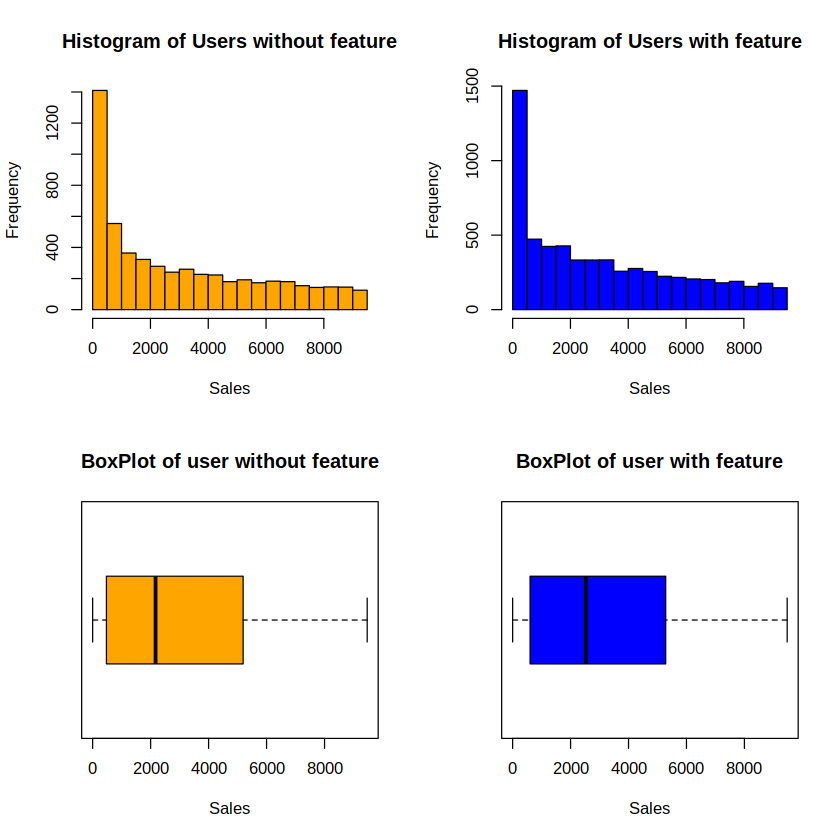

In [162]:
par(mfrow=c(2,2))




hist (data_wo$Order.Value, breaks= 15,
     freq=T, include.lowest=T, right=T, 
     col= "orange", border=9, 
     main="Histogram of Users without feature", 
     xlab="Sales", 
     ylab="Frequency", 
     axes=T, plot=T, labels=F)
hist (data_wt$Order.Value , breaks= 15,
     freq=T, include.lowest=T, right=T, 
     col="blue", border=9, 
     main="Histogram of Users with feature", 
     xlab="Sales", 
     ylab="Frequency", 
     axes=T, plot=T, labels=F)
boxplot (data_wo$Order.Value , col= "orange", border= "black", 
        main="BoxPlot of user without feature", 
        xlab="Sales",
        horizontal = T)
boxplot (data_wt$Order.Value , col= "blue", border= "black", 
        main="BoxPlot of user with feature", 
        xlab="Sales",
        horizontal = T)

- Podemos ver que las dos variables, la que contempla usuarios que han usado la nueva funcionalidad y 
    la que contempla los usuarios que no han usado la nueva funcionalidad, siguen una distribución parecida
    a una geomètrica.

- A simple vista ya podemos ver basandonos en los histogramas que la nueva funcionalidad ha aportado 
    un incremento en ventas superior, del orden de un incremento del 20%. 

- Por otro lado, como podemos comprovar los usuarios tienden a generar ordenes de compra de poco
    valor monetario, inferior a 500€. Tanto con la funcionalidad, como sin la funcionalidad.

- En lo que refiere al valor central del dataframe de las dos variables, es ciertamente parecido. 
    Para los usuarios sin la funcionalidad 2100 euros y para el los usuarios con la funcionalidad 2800 euros. 
    Esto es debido a la distribución que siguen las dos variables

In [110]:
sum(is.na(data))

[1] 0

Confirmamos que no tenemos celdas vacias en el dataset y que la muestra de datos es limpia

In [109]:
cat("Outliers in without feature: ", boxplot(data_wo$Order_Value, plot=F)$Out, " ; Outliers in with feature: ",boxplot(data_wt$Order_Value, plot=F)$Out)

Outliers in without feature:   ; Outliers in with feature: 

Confirmamos que no tenemos outliers un el espacio muestral

OBSERVACIONES

- Número de registros 11786
- 2 variables que generan estos registros: Usuarios que han tenido acceso a la nueva funcionalidad y usuarios que no han tenido acceso a la funcionalidad
- Registros de usuarios sin funcionalidad 5502
- Registros de usuarios con funcionalidad 6284
- Degrees of freedom: 11786 + (11786-2) = 23570
- No existen valores atipicos ni valores perdidos.
- Ambas mmuestras parecen estar distribuidos geometricamente.
- Los valores medios y medianos son muy parejos.




In [171]:
t.test(data_wo$Order.Value, data_wt$Order.Value,
       paired = F,
       conf.level = 0.95,
       alternative = 't')



	Welch Two Sample t-test

data:  data_wo$Order.Value and data_wt$Order.Value
t = -2.8757, df = 11554, p-value = 0.004039
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -250.64816  -47.45239
sample estimates:
mean of x mean of y 
 3024.787  3173.837 


- En este caso, el p value es de 0.004 inferior a 0.05. Por lo tanto, confirmamos que 
    se puede rechazar la hipotesis nula.
- Confirmamos que con la nueva funcionalidad vamos a generar mayor facturación para la plataforma eCOM.
- El intervalo de confianza del 95% para la diferencia en la media es de -250.64 to -47.45

In [161]:
t.test(data_wo$Order.Value, 
       paired = F,
       conf.level = 0.95,
       alternative = 't')


	One Sample t-test

data:  data_wo$Order.Value
t = 79.626, df = 5501, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 2950.317 3099.257
sample estimates:
mean of x 
 3024.787 


- El intervalo de confianza del 95% para la diferencia en la media es de 29050.31 to 3099.25

In [163]:
t.test(data_wt$Order.Value,
       paired = F, 
       conf.level = 0.95,
       alternative = 't')


	One Sample t-test

data:  data_wt$Order.Value
t = 90.006, df = 6283, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 3104.711 3242.964
sample estimates:
mean of x 
 3173.837 


- El intervalo de confianza del 95% para la diferencia en la media es de 3104.71 to 3242.96

In [165]:
SD = sd(data_wo$Order.Value - data_wt$Order.Value)
DELTA1 <- 5
power.t.test(power = .95, delta = DELTA1, sd = SD, 
             type = "t", 
             alternative = "t", 
             sig.level = .05)

Warning message in data_wo$Order.Value - data_wt$Order.Value:
“longer object length is not a multiple of shorter object length”



     Two-sample t test power calculation 

              n = 9309908
          delta = 5
             sd = 2992.571
      sig.level = 0.05
          power = 0.95
    alternative = two.sided

NOTE: n is number in *each* group


- Como podemos ver para igualar el error de tipo 1 y tipo 2, necesitariamos un muestreo de 9M de registros

COMENTARIOS GENERALES DEL EJERCICIO:
- Para este caso, hemos usado el t.test pero podríamos usar un z.test. Que significa que usuariamos una estrategia de distribución Gaussiana, dado que tenemos más de 40 muestras. De confirmarse de ser así, como deberíamos implementar una estrategia Gaussiana?

- En referente a los parametros a definir dentro del test;
    - Paired
    - alternative
    Me gustaría conocer todas las variables que podemos usar para ejecutar el test.
    
- Para calcular el tamaño del data set necesario para igualar los dos errores, no he acabado de entender la lógica del proceso. Me gustaría que le pudieramos dedicar un tiempo en clase repasando estos conceptos.


CONCLUSIONES FINALES
- La empresa eCOM debería de implementar la funcionalidad de recomendación a toda la población de sus consumidores. Dado que como hemos visto, podemos observar un crecimiento del 20% en facturación. Además, no solo los resultados acompañan. Estadísticamente el p value es inferior al 5% (concretamente 0.4%) y existe una probabilidad del 95% que la media sea 3104.71 to 3242.96, claramente superior a la muestra de cuando los usuarios no tenian acceso a la funcionalidad de recomendación.

- Como comentario final, me gustaría generar una duda de la aplicación a nivel profesional. El ejercicio realizado ha sido un ejemplo práctico de un A/B testing, donde queremos evaluar si con una funcionalidad augmentaremos la facturación de una unidad de negocio en concreto. 
Como podríamos confirmar que este augmento de facturación no ha sido una reacción de los usuarios aleatoria? Deberíamos repetir el test varias veces a lo largo del año? Deberíamos asegurar que los usuarios que usan la funcionalidad y los que no, no sufren ningún sesgo de edad, zona geográfica, poder adquisitivo?
